<a href="https://colab.research.google.com/github/mukul-mschauhan/Machine-Learning-Projects/blob/master/GGN-Aug-Bigmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BigMart Sales Prediction!
Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [5]:
train.shape, test.shape

((8523, 12), (5681, 11))

# Steps to Building the Model

* Univariate
* Bivariate Analysis
* Missing Values
* Outlier Treatment
* Feature Engineering
* **Statistical Hypothesis Testing**
* Scaling and Transformation

In [57]:
# lets combine the datasets

combined = pd.concat([train,test], ignore_index = True)
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [9]:
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

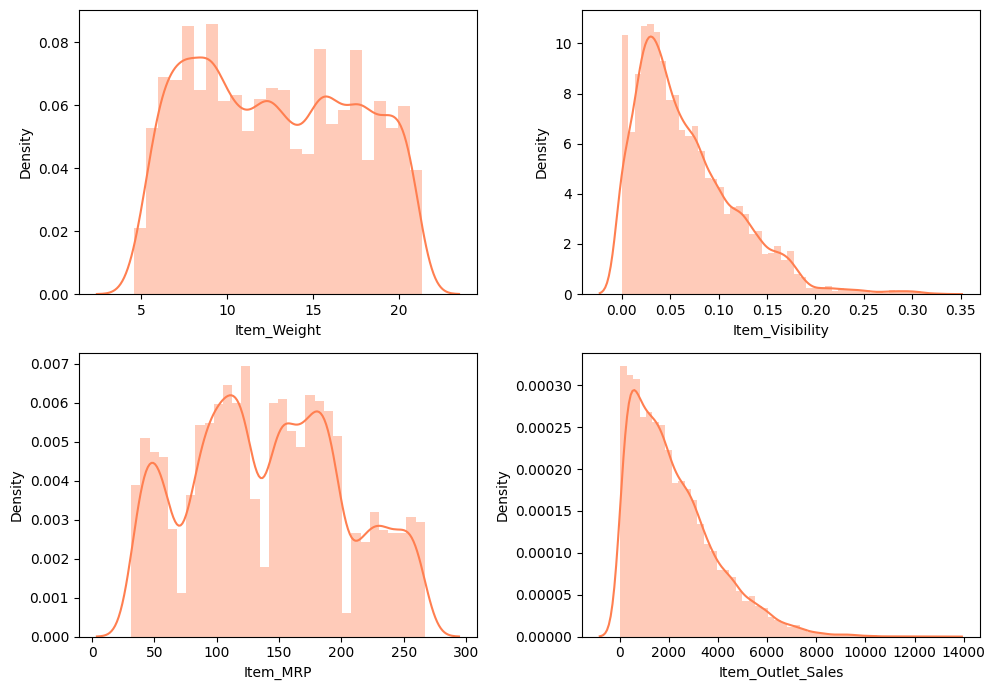

In [10]:
num_cols = ['Item_Weight', 'Item_Visibility',
            'Item_MRP','Item_Outlet_Sales']

nrows = 2
ncols =2
iterator = 1
plt.figure(figsize = [10, 7])

for i in num_cols:
  plt.subplot(nrows,ncols,iterator)
  sns.distplot(combined.loc[:, i], color = "coral")
  iterator += 1

plt.tight_layout()
plt.show()

In [11]:
# Categorical Analysis

combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

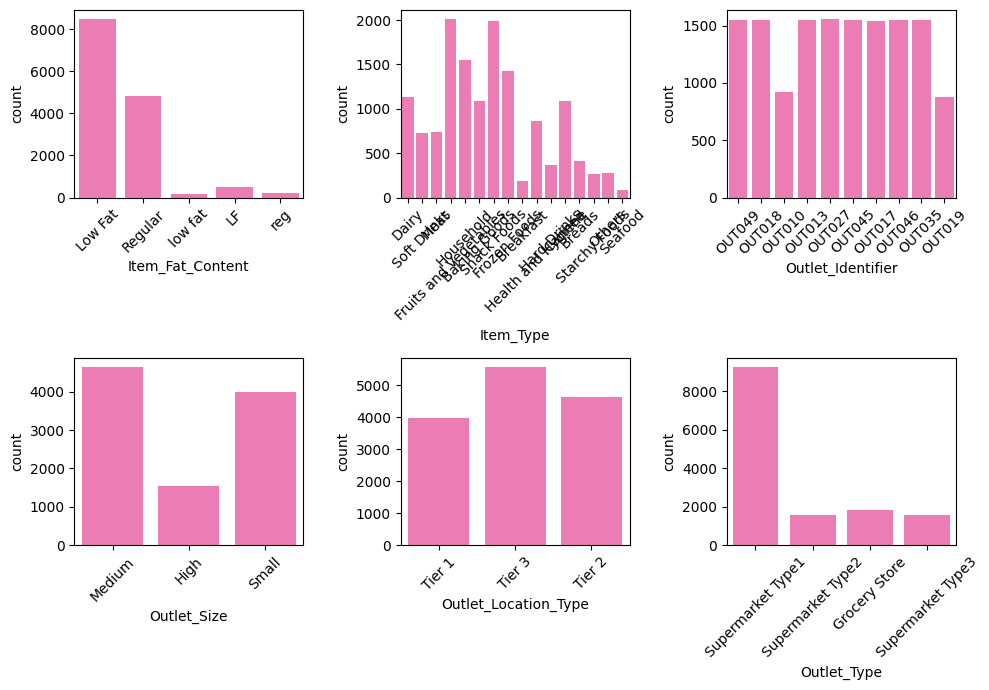

In [17]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 2
ncols =3
iterator = 1
plt.figure(figsize = [10, 7])

for i in cat_cols:
  plt.subplot(nrows,ncols,iterator)
  sns.countplot(x = combined.loc[:, i], color = "hotpink",
                )
  iterator += 1
  plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [58]:
# Convert the Item Fat Content...
combined.Item_Fat_Content.unique() # Low Fat, Regular

combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                  value =["Low Fat", "Low Fat", "Regular"],
                                  inplace = True)



<Axes: xlabel='Item_Type'>

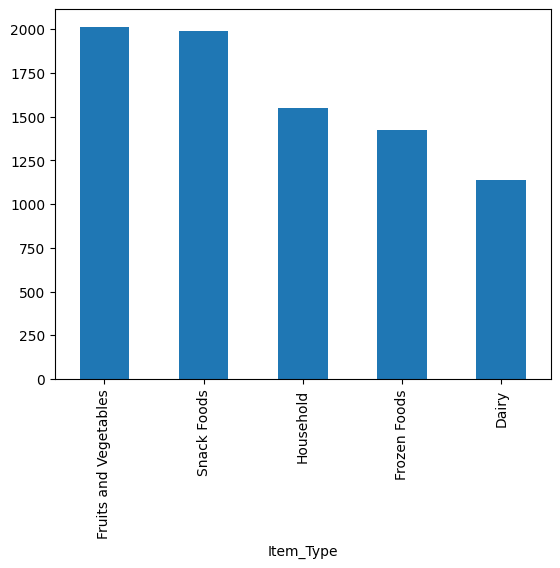

In [23]:
# Item Type
combined.Item_Type.value_counts()[:5].plot(kind = "bar")
# Top5: Snacks, Dairy, Frozen Food, Household and Fruits & Veggies


##Bivariate Analysis

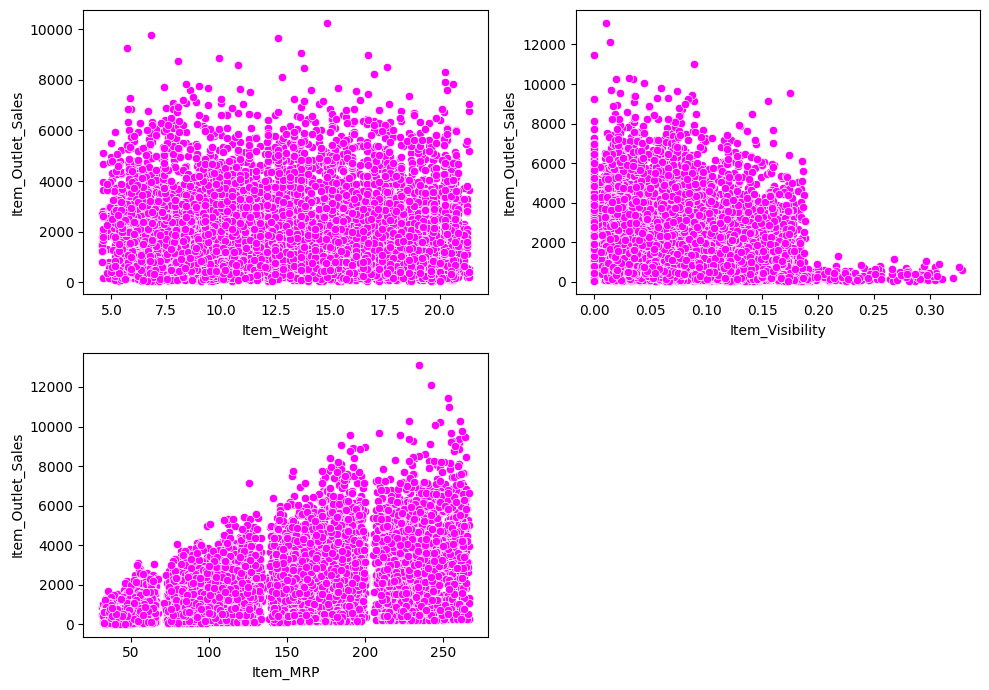

In [25]:
nums = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

nrows = 2
ncols = 2
iterator = 1
plt.figure(figsize = [10, 7])

for i in nums:
  plt.subplot(nrows, ncols, iterator)
  sns.scatterplot(x = i, y = "Item_Outlet_Sales", data = combined,
                  color = "magenta")
  iterator += 1

plt.tight_layout()
plt.show()

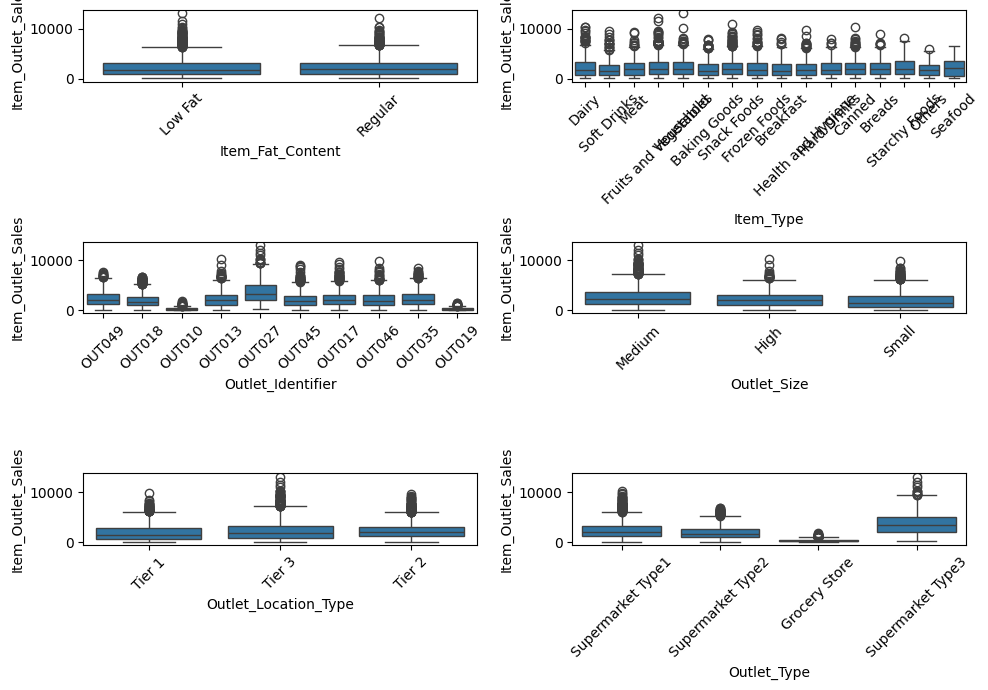

In [29]:
# Cat vs Sales
nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize = [10, 7])

for i in cat_cols:
  plt.subplot(nrows, ncols, iterator)
  sns.boxplot(x = i, y = "Item_Outlet_Sales", data = combined)
  iterator += 1
  plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

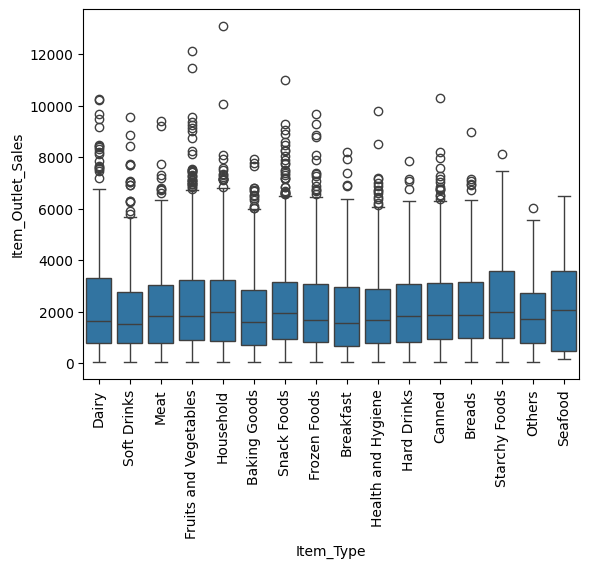

In [32]:
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = combined)
plt.xticks(rotation = 90)
plt.show()

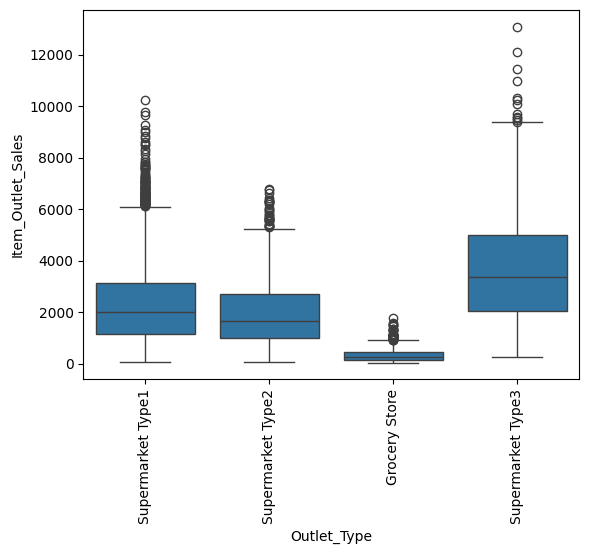

In [33]:
sns.boxplot(x = "Outlet_Type", y = "Item_Outlet_Sales", data = combined)
plt.xticks(rotation = 90)
plt.show()

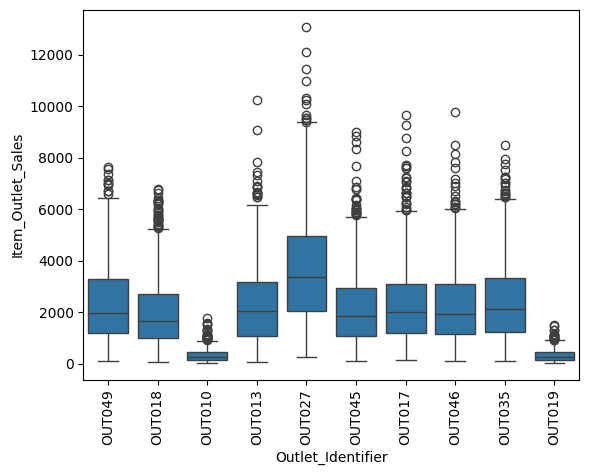

In [34]:
sns.boxplot(x = "Outlet_Identifier",
            y = "Item_Outlet_Sales", data = combined)
plt.xticks(rotation = 90)
plt.show()# Top 2 Out27 and Out13

# Missing Values


In [35]:
combined.isnull().sum()[combined.isnull().sum()!=0]

,0
Item_Weight,2439
Outlet_Size,4016
Item_Outlet_Sales,5681


In [36]:
combined.loc[combined.Item_Weight.isnull(), :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [39]:
combined.loc[combined.Item_Identifier=="FDC14", "Item_Weight"]

,Item_Weight
29,NaN
3609,14.5
4297,14.5
5760,14.5
6257,NaN
6346,14.5
6478,14.5
7031,14.5
9220,14.5
10510,14.5


In [59]:
# Missing Values

combined["Item_Weight"] = \
combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: \
                                                         x.fillna(x.mean()))

In [60]:
combined["Item_Visibility"] = \
combined.groupby("Item_Identifier")\
 ["Item_Visibility"].transform(lambda x:x.replace(0, x.median()))

In [46]:
combined.loc[combined.Outlet_Size.isnull(), :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [49]:
combined.groupby(["Outlet_Identifier", 'Outlet_Type'])["Outlet_Size"].value_counts()

,,,count
Outlet_Identifier,Outlet_Type,Outlet_Size,
OUT013,Supermarket Type1,High,1553
OUT018,Supermarket Type2,Medium,1546
OUT019,Grocery Store,Small,880
OUT027,Supermarket Type3,Medium,1559
OUT035,Supermarket Type1,Small,1550
OUT046,Supermarket Type1,Small,1550
OUT049,Supermarket Type1,Medium,1550


In [54]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [61]:
# Imputting Small in Outlet Size
combined.loc[combined.Outlet_Size.isnull(),
                                        "Outlet_Size"] = "Small"

## Feature Engineering

In [62]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [65]:
# Extracting Item IDs
ids = []

for i in combined.Item_Identifier:
   ids.append(i[:2])

In [66]:
combined["Item_IDS"] = pd.Series(ids)

In [68]:
# non-edible in Item Fat Content

combined.loc[combined.Item_IDS=="NC", "Item_Fat_Content"]="Non_Edible"

In [70]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [72]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
              'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

def badaldo(x):
  if x in perishables:
    return("Perishable")
  else:
    return("Non-Perishable")

In [73]:
combined["Item_Type_Cat"]= combined.Item_Type.apply(badaldo)

In [79]:
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [78]:
combined["Magic1"] = combined.groupby("Item_Type")\
["Item_Outlet_Sales"].transform("count")
combined["Magic2"] = combined.groupby("Item_Type")\
["Item_Outlet_Sales"].transform("mean")
combined["Magic3"] = combined.groupby("Item_Type")\
["Item_Outlet_Sales"].transform("median")
combined["Magic4"] = combined.groupby("Item_Type")\
["Item_Outlet_Sales"].transform("std")
combined["Magic5"] = combined.groupby("Item_Type")\
["Item_Outlet_Sales"].transform("min")
combined["Magic6"] = combined.groupby("Item_Type")\
["Item_Outlet_Sales"].transform("max")

In [80]:
combined["Magic7"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("count")
combined["Magic8"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("mean")
combined["Magic9"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("median")
combined["Magic10"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("std")
combined["Magic11"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("min")
combined["Magic12"] = combined.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("max")

In [82]:
# Split the Data in train and test

newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

train.shape, test.shape, newtrain.shape, newtest.shape

((8523, 12), (5681, 11), (8523, 26), (5681, 25))

In [84]:
newtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_IDS', 'Item_Type_Cat',
       'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7',
       'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12'],
      dtype='object')

In [86]:
cols = ['Item_Weight', 'Item_Visibility',
       'Item_MRP','Magic1', 'Magic2',
        'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7',
       'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12']
import scipy.stats as stats
pvalue = []

for i in cols:
  teststats, pval = stats.ttest_ind(newtrain.loc[:, i],
                                    newtrain.Item_Outlet_Sales)
  pvalue.append(pval)

pd.DataFrame(pvalue, columns = ["PValue"], index = cols)\
.sort_values("PValue", ascending = False)

,PValue
Magic2,1.000000e+00
Magic8,1.000000e+00
Magic9,3.178472e-49
Magic3,9.443741e-98
Magic4,1.556293e-145
Item_Weight,0.000000e+00
Item_Visibility,0.000000e+00
Item_MRP,0.000000e+00
Magic1,0.000000e+00
Magic5,0.000000e+00


In [87]:
# Ho: Item Type and Target are not related
# Ha: Ho is False

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols("Item_Outlet_Sales~Item_Type", data= newtrain).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Type,15.0,1.176182e+08,7.841211e+06,2.700653,0.000388
Residual,8507.0,2.469965e+10,2.903450e+06,NaN,NaN
